# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('01-x_train-IEMOCAP-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('01-x_test-IEMOCAP-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('01-y_train-IEMOCAP-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('01-y_test-IEMOCAP-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)

In [3]:
x_train

,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
1516,0.719886,-7.561275,14.159623,0.067763,-0.013205,0.331457,26.602472,-15.937595,24.957502,-10.927029,...,15.962138,635.076965,1151.441162,-17.274574,1670.986328,866.983521,-26.561573,2681.441162,883.905273,-29.146044
602,0.314641,-13.826884,22.881105,0.030372,-0.014007,0.106794,29.668583,3.931919,21.301250,-7.447769,...,19.214899,499.657227,1173.862061,-49.469902,1488.600830,842.568970,-59.784946,2557.296143,689.890076,-64.254089
518,0.443984,-10.524221,19.481911,0.049773,-0.004622,0.161864,19.540403,12.188277,19.338507,-7.379906,...,21.955193,548.473694,1133.970825,-17.711372,1579.145020,707.570374,-32.204208,2659.726562,556.057800,-35.205883
2209,0.268103,-10.351037,18.100561,0.000196,-0.015517,0.089043,22.477982,4.628053,24.113041,-5.764767,...,15.155513,445.112061,1171.430420,-77.061455,1454.227173,799.102417,-84.888458,2423.773193,877.357544,-88.534065
1721,1.489267,-1.774669,13.210146,0.074423,-0.000570,0.835117,23.833462,-24.363897,7.678145,-18.013659,...,8.824176,736.313049,1162.541138,-16.693254,1697.744019,1064.874268,-16.814413,2669.759766,918.399841,-23.407499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.121301,-13.012323,20.468739,0.012566,-0.015526,0.029892,24.568514,4.888472,18.272919,-10.907483,...,10.035698,503.674072,1276.516968,-114.291458,1549.539917,1044.725342,-122.924423,2508.156250,875.285339,-123.512115
1731,0.165902,-18.666023,27.555529,0.017532,-0.022802,0.041434,32.923260,1.475819,21.674389,-14.944551,...,22.358730,673.192688,1370.454224,-15.911981,1698.700928,961.161987,-29.875488,2739.314697,860.158691,-33.577621
763,0.705233,-10.934845,20.832191,0.032123,-0.014040,0.296190,29.328007,-1.673850,16.420149,-14.524237,...,16.508810,505.037109,1200.989746,-46.904739,1440.581177,908.405945,-51.135757,2567.123535,652.237549,-58.575439
835,0.152195,-18.900702,25.110928,0.022950,-0.015909,0.045306,29.697210,8.321755,32.056129,-5.489374,...,19.120968,389.106476,1101.953979,-1.563233,1522.205444,943.652405,-28.814367,2340.425293,807.583984,-25.708191


# **SELECCION DE CARACTERISTICAS**

In [4]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **BALANCEO DE DATOS**

In [5]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [6]:
overs = RandomOverSampler()

In [7]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [8]:
y_t_overs

,Emociones
0,2
1,2
2,2
3,3
4,0
...,...
3439,3
3440,3
3441,3
3442,3


# **NORMALIZACION DE CARACTERISTICAS**

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_t_overs)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [10]:
x_train_std

array([[ 0.34436441,  0.66795321, -1.28628801, ...,  0.87030416,
         0.28939306,  1.04846033],
       [-0.43424183, -0.91337193,  0.81084503, ..., -0.11451015,
        -1.28136334,  0.09891271],
       [-0.18573177, -0.07984025, -0.00651185, ...,  0.69804716,
        -2.3648759 ,  0.88456325],
       ...,
       [ 0.17938778,  0.63455207, -1.64900289, ..., -0.13664096,
         0.01284759,  1.57536674],
       [-0.86370346, -0.22371339, -0.53191596, ..., -0.10804541,
         1.25608317, -1.16361467],
       [-0.55418488,  0.31344905, -0.5598371 , ..., -1.47838941,
         0.55468837, -1.32557842]])

# **MODELO DE MARCHINE LEARNING**

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
clf.fit(x_train_std, y_t_overs) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [15]:
#para generar 300 un nuevo modelo y guardar el que tiene mayor accuracy
from sklearn import metrics
mayor=0
for i in range(300):
  overs = RandomOverSampler()
  overs.fit(x_train, y_train)
  x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

  sc = StandardScaler()
  x_train_std = sc.fit_transform(x_t_overs)
  #para trasnformar los datos de testing
  x_test_std = sc.transform(x_test)

  clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
  clf.fit(x_train_std, y_t_overs)
  y_predict = clf.predict(x_test_std)
  predicion = metrics.accuracy_score(y_test, y_predict)
  if predicion >mayor:
    mayor= predicion
    modelo = clf
  print(f" prueba :{i} PRECISION ====  {metrics.accuracy_score(y_test, y_predict)} ")
clf= modelo

 prueba :0 PRECISION ====  0.4232456140350877 
 prueba :1 PRECISION ====  0.4934210526315789 
 prueba :2 PRECISION ====  0.47368421052631576 
 prueba :3 PRECISION ====  0.47368421052631576 
 prueba :4 PRECISION ====  0.4824561403508772 
 prueba :5 PRECISION ====  0.48903508771929827 
 prueba :6 PRECISION ====  0.5197368421052632 
 prueba :7 PRECISION ====  0.48903508771929827 
 prueba :8 PRECISION ====  0.4780701754385965 
 prueba :9 PRECISION ====  0.5482456140350878 
 prueba :10 PRECISION ====  0.45614035087719296 
 prueba :11 PRECISION ====  0.44956140350877194 
 prueba :12 PRECISION ====  0.5 
 prueba :13 PRECISION ====  0.5307017543859649 
 prueba :14 PRECISION ====  0.48464912280701755 
 prueba :15 PRECISION ====  0.48026315789473684 
 prueba :16 PRECISION ====  0.5570175438596491 
 prueba :17 PRECISION ====  0.44956140350877194 
 prueba :18 PRECISION ====  0.47368421052631576 
 prueba :19 PRECISION ====  0.4473684210526316 
 prueba :20 PRECISION ====  0.4692982456140351 
 prueba

In [16]:
y_predict = clf.predict(x_test_std)
y_predict

array([2, 2, 3, 2, 3, 2, 2, 2, 1, 0, 3, 3, 1, 2, 0, 3, 1, 0, 2, 1, 3, 2,
       1, 3, 3, 1, 2, 2, 3, 0, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 0, 2, 2,
       2, 3, 2, 3, 2, 2, 0, 2, 2, 2, 1, 1, 2, 3, 0, 3, 2, 3, 3, 2, 1, 3,
       1, 2, 2, 3, 1, 3, 3, 3, 2, 2, 0, 2, 3, 1, 3, 3, 3, 2, 0, 2, 2, 3,
       3, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 3, 0, 0, 3,
       1, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 1, 3, 1, 3, 1, 2, 0, 1, 2, 2, 0,
       2, 2, 1, 2, 2, 2, 1, 2, 3, 2, 2, 0, 3, 3, 0, 1, 2, 2, 2, 3, 1, 1,
       0, 3, 3, 2, 1, 3, 2, 2, 0, 3, 3, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 0, 0, 3, 2, 0, 0, 1, 3, 3, 1, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 1, 3, 2, 1, 2, 3, 2, 2, 2, 1, 1, 2, 1, 3, 3, 3, 3, 1, 2,
       0, 1, 3, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 3, 0, 1,
       1, 3, 2, 1, 3, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3,
       3, 1, 0, 3, 2, 3, 0, 2, 3, 3, 0, 3, 1, 3, 3, 2, 0, 2, 3, 2, 2, 2,
       2, 2, 3, 3, 3, 2, 2, 2, 0, 2, 3, 3, 3, 3, 3,

# **EVALUACION**

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.48      0.58      0.53        53
           1       0.21      0.27      0.23        56
           2       0.68      0.56      0.62       238
           3       0.59      0.66      0.62       109

    accuracy                           0.55       456
   macro avg       0.49      0.52      0.50       456
weighted avg       0.58      0.55      0.56       456



In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.48      0.58      0.53        53
           1       0.21      0.27      0.23        56
           2       0.68      0.56      0.62       238
           3       0.59      0.66      0.62       109

    accuracy                           0.55       456
   macro avg       0.49      0.52      0.50       456
weighted avg       0.58      0.55      0.56       456

Matriz de confusión, sin normalización
[[ 31  13   8   1]
 [ 13  15  22   6]
 [ 20  41 134  43]
 [  0   4  33  72]]


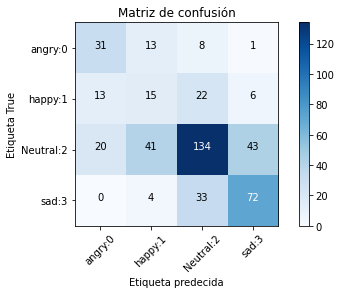

In [19]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')